# Unsupervised Learning
## Dimensionality Reduction with t-SNE

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### 1. Load the dataset and make your preprocessing like normalizing the data.

In [24]:
mnist = datasets.fetch_openml('Fashion-MNIST', version=1, cache=True)

In [25]:
X = pd.DataFrame(mnist.data, columns=mnist.feature_names)
Y = pd.Series(mnist.target)

print(Y)
X

0        9
1        0
2        0
3        3
4        0
        ..
69995    9
69996    1
69997    8
69998    1
69999    5
Length: 70000, dtype: object


pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0    33.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0          0.0  ...       0.0       0.0       0.0       0.0       0.0   
1          0.0  ...     119.0     114.0     130.0      76.0       0.0   
2         22.0  ...       0.0       0.0       1.0       0.0       0.0   
3         96.0  ...       0.0       0.0       0.0       0.0       0.0   
4          0.0  ...       0.0       0.0       0.0       0.0       0.0   
...        ...  ...       ...       ...       ...       ...       ...   
69995      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69996     31.0  ...       0.0       0.0       0.0       0.0       0.0   
69997      0.0  ...      27.0       0.0       0.0       0.0       0.0   
69998      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69999      0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0           0.0       0.0       0.0       0.0       0.0  
1           0.0       0.0       0.0       0.0       0.0  
2           0.0       0.0       0.0       0.0       0.0  
3           0.0       0.0       0.0       0.0       0.0  
4           0.0       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...  
69995       0.0       0.0       0.0       0.0       0.0  
69996       0.0       0.0       0.0       0.0       0.0  
69997       0.0       0.0       0.0       0.0       0.0  
69998       0.0       0.0       0.0       0.0       0.0  
69999       0.0       0.0       0.0       0.0       0.0  

[70000 rows x 784 columns]

In [29]:
sample_indices = X.sample(10000).index

X_sample = X.iloc[sample_indices]
Y_sample = Y[sample_indices]

print(Y_sample)
X_sample

35535    6
2380     7
65592    3
25497    1
16096    3
        ..
1987     3
293      6
18254    4
44727    6
45220    2
Length: 10000, dtype: object


pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
35535     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2380      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
65592     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
25497     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
16096     0.0     0.0     0.0     0.0     0.0     1.0     1.0     1.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
1987      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
293       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
18254     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
44727     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
45220     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0    16.0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
35535     71.0  ...      20.0       0.0       0.0       0.0       0.0   
2380       0.0  ...       0.0       0.0       0.0       0.0       0.0   
65592     63.0  ...     126.0     165.0      40.0       0.0       3.0   
25497      0.0  ...      10.0       0.0       0.0       0.0       0.0   
16096      0.0  ...      87.0      95.0     112.0      81.0       0.0   
...        ...  ...       ...       ...       ...       ...       ...   
1987       0.0  ...       0.0       0.0       0.0       0.0       0.0   
293        1.0  ...       7.0       0.0       0.0       0.0       0.0   
18254      0.0  ...     105.0      56.0       0.0       4.0       0.0   
44727      3.0  ...      57.0       0.0       0.0       0.0       0.0   
45220     10.0  ...       6.0      18.0      28.0       0.0     120.0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
35535       0.0       0.0       0.0       0.0       0.0  
2380        0.0       0.0       0.0       0.0       0.0  
65592       0.0       0.0       0.0       0.0       0.0  
25497       0.0       0.0       0.0       0.0       0.0  
16096       0.0       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...  
1987        0.0       0.0       0.0       0.0       0.0  
293         0.0       0.0       0.0       0.0       0.0  
18254       0.0       0.0       0.0       0.0       0.0  
44727       0.0       0.0       0.0       0.0       0.0  
45220      87.0      21.0       0.0       0.0       0.0  

[10000 rows x 784 columns]

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X_sample)

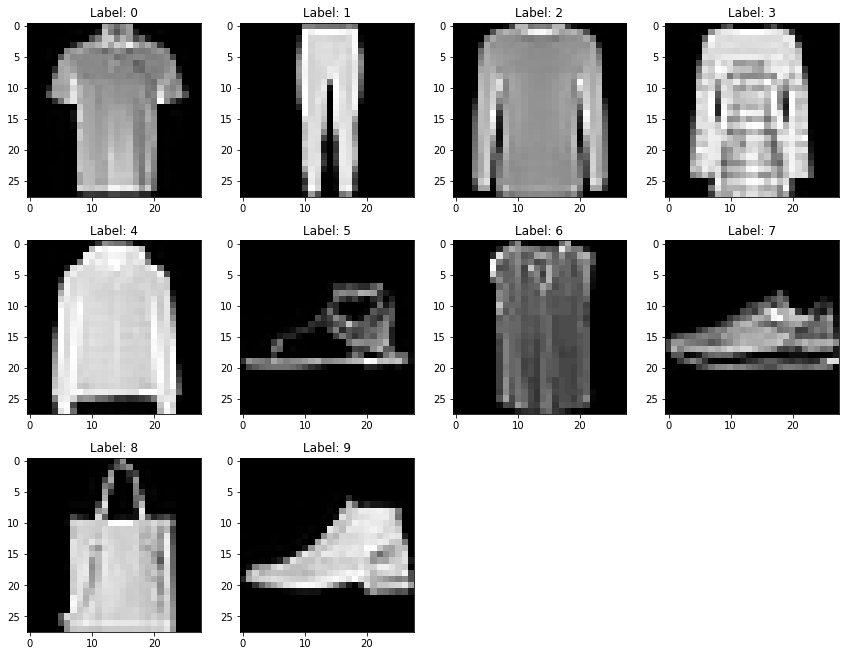

In [31]:
import math

X_norm_df = pd.DataFrame(X_norm, index=Y_sample.index)

def get_gt_sq(num):
    sq = math.sqrt(num)
    if float(int(sq)) != sq:
        sq += 1
    return int(sq)

imsq = get_gt_sq(len(X.to_numpy()[0]))
labelsq = get_gt_sq(Y.nunique())

subplot_df = pd.DataFrame()

plt.figure(figsize=(labelsq*3, labelsq*3))
subplot_itr = 1

for label in Y.sort_values().unique():
    plt.subplot(labelsq, labelsq, subplot_itr)
    i = Y_sample.loc[Y_sample == label].index[0]
    plt.imshow(X_norm_df.loc[i].to_numpy().reshape(imsq, imsq), cmap='gray')
    plt.title('Label: {}'.format(Y[i]))
    subplot_itr += 1
plt.tight_layout()
plt.show()

### 2. Apply t-SNE to the data by setting `n_components=2.`


In [32]:
tsne = TSNE(n_components=2, perplexity=10, n_iter=300)
tsne_results = tsne.fit_transform(X_norm)

### 3. Using the two-dimensional t-SNE representation, draw a graph of the data by coloring and labeling the data points as we did in the checkpoint.

In [37]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
y = Y_sample.to_numpy()
def plot_clusters(X_numpy, Y_numpy):
    for i in range(X_numpy.shape[0]):
        plt.text(X_numpy[i, 0], X_numpy[i, 1], str(Y_numpy[i]),
                color=colours[int(Y_numpy[i])],
                fontdict={'weight': 'bold', 'size': 50}
            )
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

plot_clusters(tsne_results, y)

### 4. Do you think t-SNE solution is satisfactory? Can you distinguish between different classes easily? Which one has done a better job: t-SNE or the PCA you applied in the assignment of the previous checkpoint?


I think the TSNE solution is much closer to satisfactory than the earlier PCA solution. I do also  think there are still several clusters that are intertwined and inseparable from other clusters.

### 5. Now, play with the different perplexity values and apply t-SNE for each of them. Which perplexity value is the best one in terms of the two-dimensional representation clarity?


In [8]:
perplexities = [10, 20, 30, 40, 50]
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=10, n_iter=300)
    tsne_results = tsne.fit_transform(X_norm)

    plt.figure(figsize=(10,5))

    plot_clusters(tsne_results, y)

NameError: name 'X_norm' is not defined